### Libraries

In [50]:
library( tidyverse )
library( PerformanceAnalytics )

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend



### Data

In [2]:
df.aa <- read.csv( '../data/raw/districta-attendance.csv' )
df.af <- read.csv( '../data/raw/districta-finance.csv' )
df.ba <- read.csv( '../data/raw/districtb-attendance.csv' )
df.bf <- read.csv( '../data/raw/districtb-finance.csv' )

In [3]:
head( df.aa )

School,Average.daily.Attendance,Percent.Attendance,Pupil.Teacher.ratio,X,X.1
Adair,451.4,90.77,33.8,NA,NA
Crew,440.6,89.32,36.3,NA,NA
Davis,139.4,86.51,22.6,NA,NA
Faith,427.3,91.12,30.0,NA,NA
Formwalt,706.1,89.46,32.5,NA,NA
Forrest,4312.0,89.72,36.0,NA,NA


In [4]:
head( df.af )

School,Value,Metric
Adair,66.90,Per-Pupil Cost
Crew,61.08,Per-Pupil Cost
Davis,105.21,Per-Pupil Cost
Faith,75.35,Per-Pupil Cost
Formwalt,59.45,Per-Pupil Cost
Forrest,59.03,Per-Pupil Cost


In [5]:
df.a <- left_join( df.aa, df.af )

Joining, by = "School"
Warning message:
“Column `School` joining factors with different levels, coercing to character vector”

In [6]:
head( df.a )

School,Average.daily.Attendance,Percent.Attendance,Pupil.Teacher.ratio,X,X.1,Value,Metric
Adair,451.4,90.77,33.8,NA,NA,66.90,Per-Pupil Cost
Adair,451.4,90.77,33.8,NA,NA,160.22,Average Monthly Teacher Salary
Crew,440.6,89.32,36.3,NA,NA,61.08,Per-Pupil Cost
Crew,440.6,89.32,36.3,NA,NA,146.24,Average Monthly Teacher Salary
Davis,139.4,86.51,22.6,NA,NA,105.21,Per-Pupil Cost
Davis,139.4,86.51,22.6,NA,NA,159.79,Average Monthly Teacher Salary


In [7]:
df.a <- df.a %>%
    spread( Metric, Value )

In [8]:
head( df.a )

School,Average.daily.Attendance,Percent.Attendance,Pupil.Teacher.ratio,X,X.1,Average Monthly Teacher Salary,Per-Pupil Cost,<NA>
Adair,451.4,90.77,33.8,NA,NA,160.22,66.90,NA
Crew,440.6,89.32,36.3,NA,NA,146.24,61.08,NA
Davis,139.4,86.51,22.6,NA,NA,159.79,105.21,NA
Faith,427.3,91.12,30.0,NA,NA,152.39,75.35,NA
Formwalt,706.1,89.46,32.5,NA,NA,139.11,59.45,NA
Forrest,4312.0,89.72,36.0,NA,NA,154.99,59.03,NA


In [9]:
names( df.a ) <- c( 'school_nm'
                   , 'attendance_daily_average_no'
                   , 'attendance_percent_no'
                   , 'pupil_teacher_ratio'
                  , 'X'
                  , 'X1'
                  , 'teacher_monthly_avg_salary_no'
                  , 'per_pupil_cost'
                  , 'X2' )

In [10]:
df.a <- df.a %>%
    select( school_nm
           , attendance_daily_average_no
           , attendance_percent_no 
           , pupil_teacher_ratio
           , teacher_monthly_avg_salary_no
          , per_pupil_cost )

In [11]:
df.a$district_cd <- 'a'

In [12]:
head( df.a )

school_nm,attendance_daily_average_no,attendance_percent_no,pupil_teacher_ratio,teacher_monthly_avg_salary_no,per_pupil_cost,district_cd
Adair,451.4,90.77,33.8,160.22,66.90,a
Crew,440.6,89.32,36.3,146.24,61.08,a
Davis,139.4,86.51,22.6,159.79,105.21,a
Faith,427.3,91.12,30.0,152.39,75.35,a
Formwalt,706.1,89.46,32.5,139.11,59.45,a
Forrest,4312.0,89.72,36.0,154.99,59.03,a


In [13]:
head( df.ba )

School,Average.daily.Attendance,Percent.Attendance,Pupil.Teacher.ratio
East Lake,225.3,91.07,36.7
Milton,262.5,93.48,31.3
Sylvan Hills,294.1,92.43,33.6
Calhoun,NA,NA,23.0
Jones,238.3,90.38,27.9
Lee,381.1,89.30,30.0


In [14]:
head( df.bf )

School,Value,Metric
East Lake,61.91,Per-Pupil Cost
Milton,90.21,Per-Pupil Cost
Sylvan Hills,59.27,Per-Pupil Cost
Calhoun,108.57,Per-Pupil Cost
Jones,81.47,Per-Pupil Cost
Lee,73.64,Per-Pupil Cost


In [15]:
df.b <- left_join( df.ba, df.bf )

Joining, by = "School"


In [16]:
df.b <- df.b[1:40,]

In [17]:
df.b <- df.b %>%
    spread( Metric, Value )

In [18]:
df.b$district_cd <- 'b'

In [19]:
head( df.b )

School,Average.daily.Attendance,Percent.Attendance,Pupil.Teacher.ratio,Average Monthly Teacher Salary,Per-Pupil Cost,district_cd
Calhoun,NA,NA,23.0,161.79,108.57,b
Capitol View,268.9,92.44,29.4,136.37,70.00,b
Connally,161.7,92.01,29.4,106.86,49.04,b
Couch,422.1,91.60,29.2,147.17,71.51,b
East Lake,225.3,91.07,36.7,106.74,61.91,b
Fair,333.9,88.39,27.6,130.24,75.14,b


In [20]:
names( df.b ) <- c( 'school_nm'
                   , 'attendance_daily_average_no'
                   , 'attendance_percent_no'
                   , 'pupil_teacher_ratio'
                  , 'teacher_monthly_avg_salary_no'
                  , 'per_pupil_cost'
                  , 'district_cd' )

In [21]:
df <- rbind( df.a, df.b )

In [22]:
df

school_nm,attendance_daily_average_no,attendance_percent_no,pupil_teacher_ratio,teacher_monthly_avg_salary_no,per_pupil_cost,district_cd
Adair,451.4,90.77,33.8,160.22,66.90,a
Crew,440.6,89.32,36.3,146.24,61.08,a
Davis,139.4,86.51,22.6,159.79,105.21,a
Faith,427.3,91.12,30.0,152.39,75.35,a
Formwalt,706.1,89.46,32.5,139.11,59.45,a
Forrest,4312.0,89.72,36.0,154.99,59.03,a
Georgia,464.2,90.53,29.2,NA,NA,a
Goldsmith,227.7,92.81,30.8,141.34,71.76,a
Gordon,551.4,91.98,31.9,153.19,66.96,a
Grant Park,684.0,86.47,28.6,135.70,73.26,a


### Missing data

#### Need to predict salary and cost for Georgia
Per pupil cost was the only variable in a linear model that was significant, and Gergia has a missing value for that as well, so will use average salary across district a.

In [23]:
mean( df[df$district_cd == 'a',]$teacher_monthly_avg_salary_no, na.rm = TRUE )

[1] 147.1126

In [24]:
df[df$school_nm == 'Georgia',]$teacher_monthly_avg_salary_no <- 141.11

In [25]:
summary( glm( per_pupil_cost
   ~ pupil_teacher_ratio
   + teacher_monthly_avg_salary_no
   , family = gaussian()
   , data = df ) )


Call:
glm(formula = per_pupil_cost ~ pupil_teacher_ratio + teacher_monthly_avg_salary_no, 
    family = gaussian(), data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-13.9610   -5.0221   -0.6164    3.7648   19.5516  

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   120.05254   17.30636   6.937 2.30e-08 ***
pupil_teacher_ratio            -2.82376    0.37152  -7.600 2.77e-09 ***
teacher_monthly_avg_salary_no   0.24300    0.08225   2.955  0.00523 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 58.97481)

    Null deviance: 6565.4  on 42  degrees of freedom
Residual deviance: 2359.0  on 40  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 302.23

Number of Fisher Scoring iterations: 2


In [26]:
( -2.82376 * 29.2 ) + ( 0.243 * 141.11 ) + 120.05254

[1] 71.88848

In [27]:
df[df$school_nm == 'Georgia',]$per_pupil_cost <- 71.89

#### Need to predict attendance daily average number oand percent for S.M. Inman and Calhoun

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

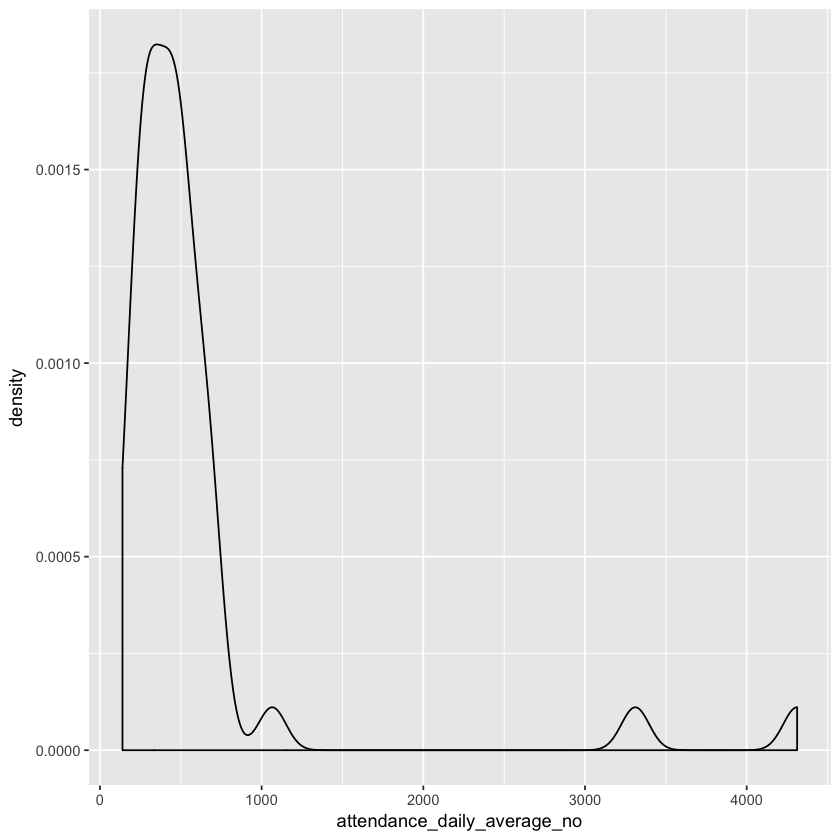

In [28]:
ggplot( df, aes( x = attendance_daily_average_no ) ) +
    geom_density()

In [29]:
fit.att <- glm( attendance_daily_average_no
            ~ per_pupil_cost
            , family = gaussian()
            , data = df[df$attendance_daily_average_no < 2000,] )

In [30]:
t( coef( fit.att )  )

(Intercept),per_pupil_cost
869.3438,-6.482003


In [31]:
df[df$school_nm == 'Calhoun',]$attendance_daily_average_no <- ( -6.482003 * 108.57 ) + 869.3438

In [32]:
df[df$school_nm == 'S.M. Inman',]$attendance_daily_average_no <- ( -6.482003 * 58.27 ) + 869.3438

In [33]:
df[40,]$attendance_percent_no <- 91.64

No variable significant in a linear model, so using average

In [35]:
mean( df$attendance_percent_no, na.rm = TRUE )

[1] 90.83837

In [38]:
df[is.na( df$attendance_percent_no),]$attendance_percent_no <- mean( df$attendance_percent_no, na.rm = TRUE )

### Outliers
Forrest, Kingsbury, and West have outlier attendance_daily_average_no values.
Forrest and West seem to be simple errors. Kingsbury is less clear

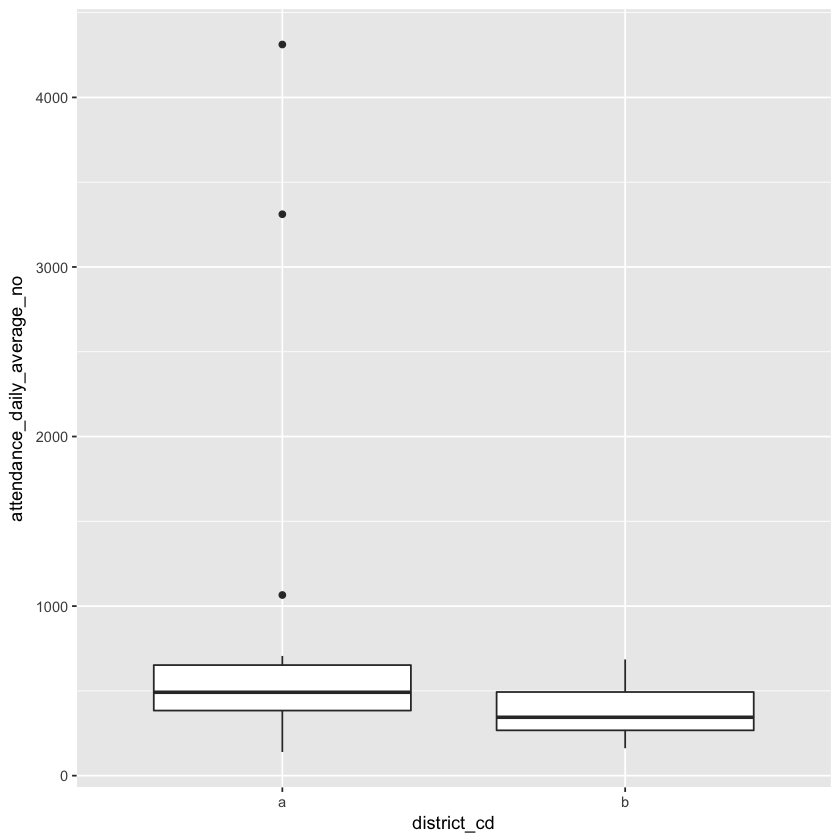

In [43]:
ggplot( df, aes( y = attendance_daily_average_no, x = district_cd ) ) +
    geom_boxplot()

In [39]:
df

school_nm,attendance_daily_average_no,attendance_percent_no,pupil_teacher_ratio,teacher_monthly_avg_salary_no,per_pupil_cost,district_cd
Adair,451.4000,90.77000,33.8,160.22,66.90,a
Crew,440.6000,89.32000,36.3,146.24,61.08,a
Davis,139.4000,86.51000,22.6,159.79,105.21,a
Faith,427.3000,91.12000,30.0,152.39,75.35,a
Formwalt,706.1000,89.46000,32.5,139.11,59.45,a
Forrest,4312.0000,89.72000,36.0,154.99,59.03,a
Georgia,464.2000,90.53000,29.2,141.11,71.89,a
Goldsmith,227.7000,92.81000,30.8,141.34,71.76,a
Gordon,551.4000,91.98000,31.9,153.19,66.96,a
Grant Park,684.0000,86.47000,28.6,135.70,73.26,a


In [44]:
df[df$school_nm == 'Forrest',]$attendance_daily_average_no <- 432

In [45]:
df[df$school_nm == 'West',]$attendance_daily_average_no <- 311

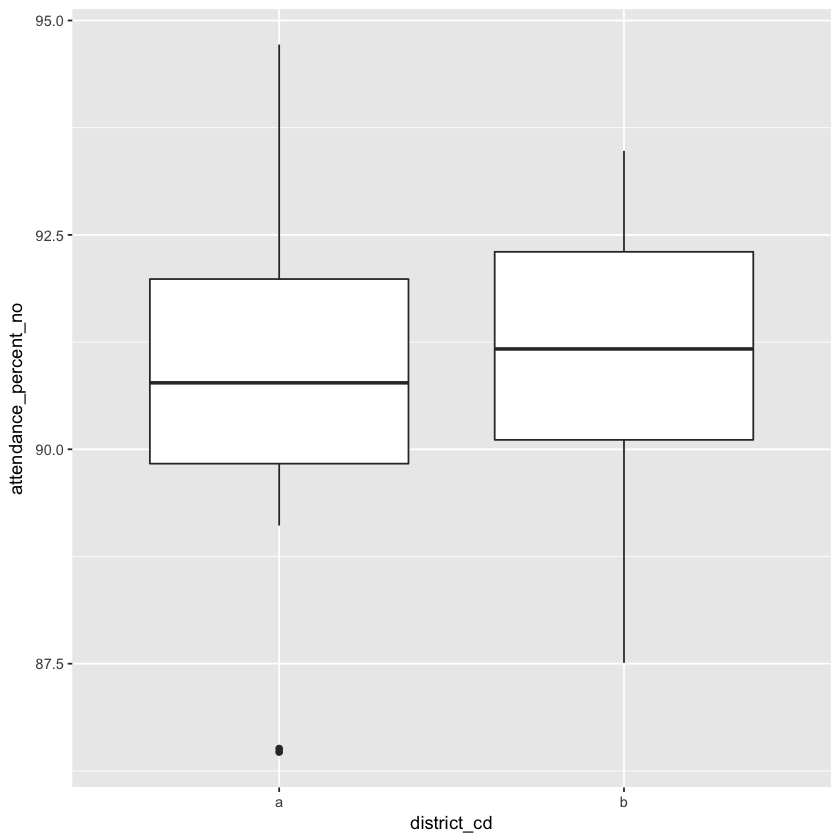

In [46]:
ggplot( df, aes( y = attendance_percent_no, x = district_cd ) ) +
    geom_boxplot()

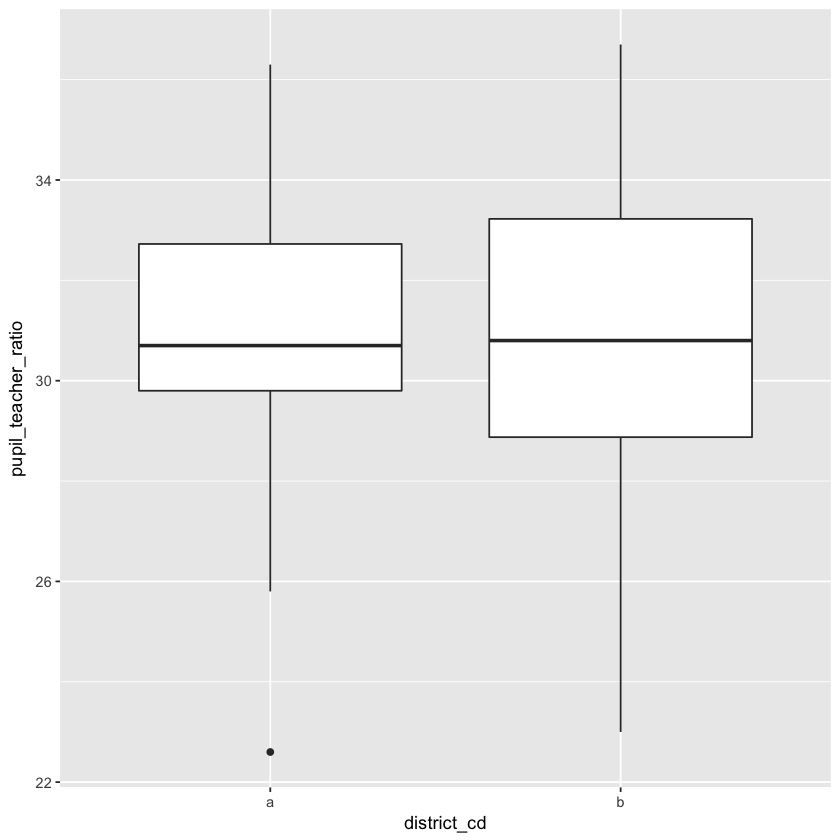

In [47]:
ggplot( df, aes( y = pupil_teacher_ratio, x = district_cd ) ) +
    geom_boxplot()

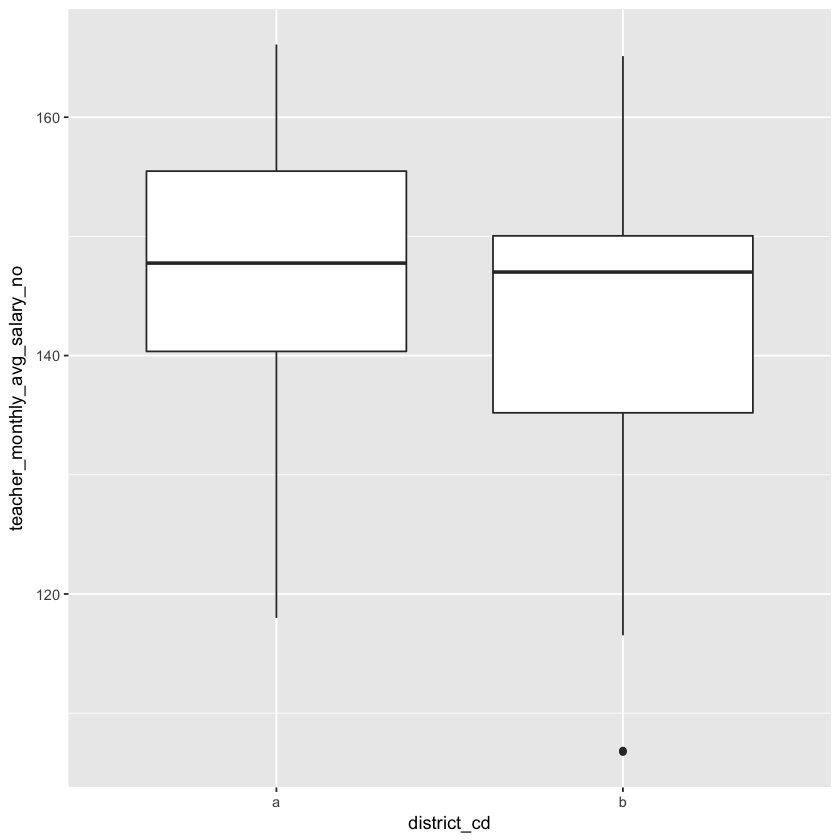

In [48]:
ggplot( df, aes( y = teacher_monthly_avg_salary_no, x = district_cd ) ) +
    geom_boxplot()

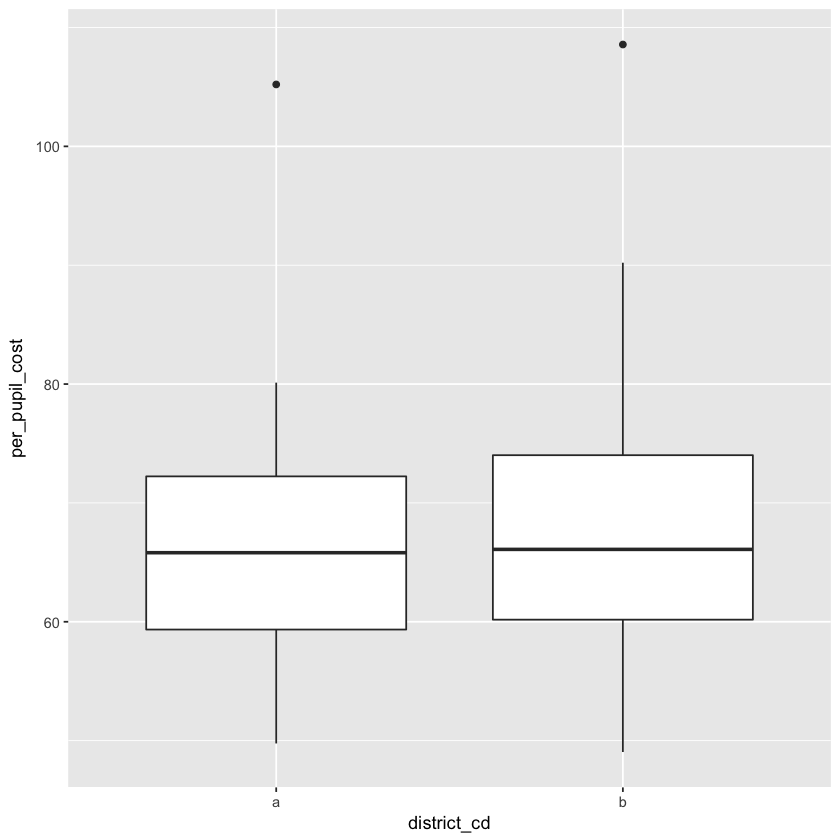

In [49]:
ggplot( df, aes( y = per_pupil_cost, x = district_cd ) ) +
    geom_boxplot()

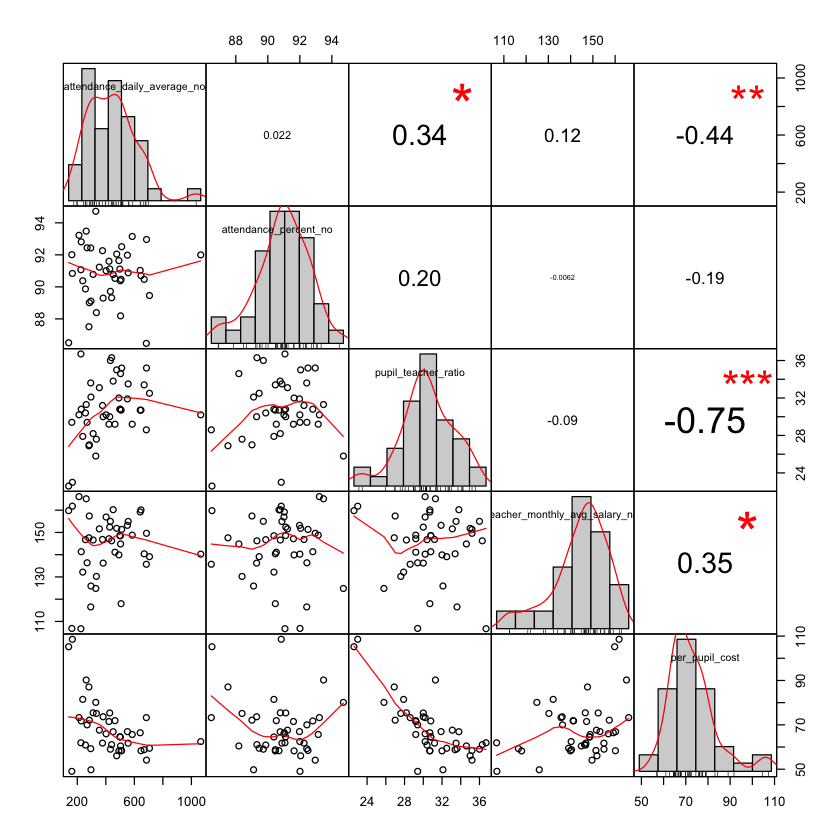

In [54]:
chart.Correlation( df[,c(2:6)] )